# Phase 3.2

Let's take a moment to look at the next phase:

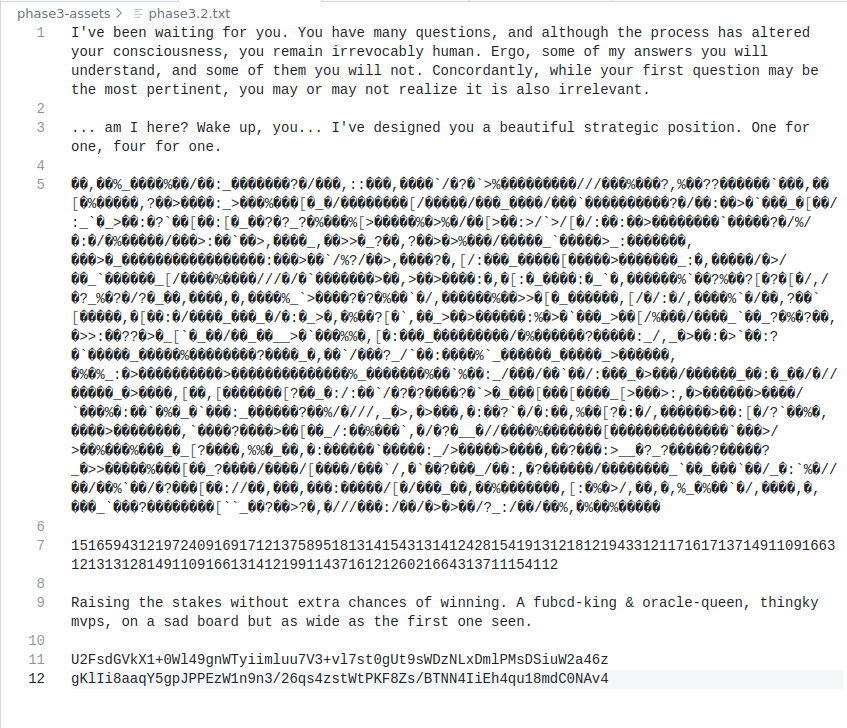

## Observations

* We have some more prose, potentially quoting The Matix again
* We have some more "..." to fill in
* We have a riddle to solve
* There is a block of badly encoded bytes that we'll need to decode
* We have a list of numbers
* We have a second riddle
* and finally we have another aes encoded blob

## Solving

If we google the first few sentences of the prose we see that it's a quotation from The Matrix Reloaded.

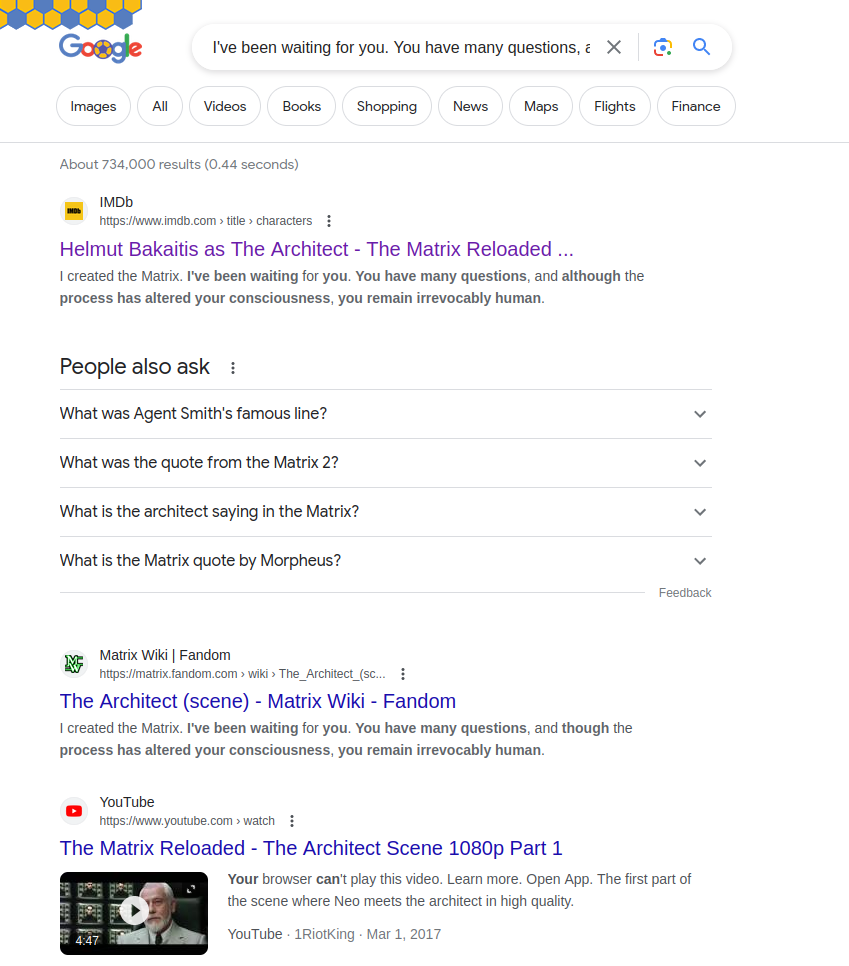

And looking at the full quote and context we have our first "..." to fill in

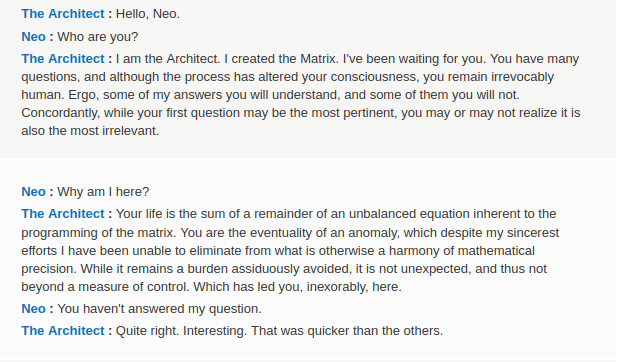

`"why" am i here?`  

Now we know that the context for this puzzle is the matrix, which again we can use to fill in the second "...". One of the early scenes in the first movie is Neo's computer screen displaying "Wake up, Neo", "The Matrix has you", "Follow the white rabbit"

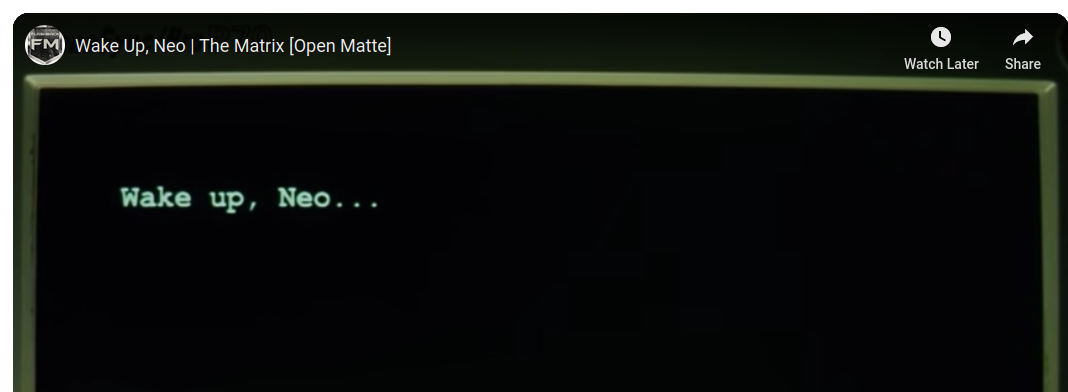

Next we have the encoded blob to decode. Depending on the editor used we can see the "?" unknown byte symbol being used, which is typical have viewing data with the wrong encoding, let's find the correct encoding.


In [1]:
with open("./phase3-assets/phase3.2.txt", 'rb') as fp:
    file_as_bytes = fp.read()
print(file_as_bytes)

b"I've been waiting for you. You have many questions, and although the process has altered your consciousness, you remain irrevocably human. Ergo, some of my answers you will understand, and some of them you will not. Concordantly, while your first question may be the most pertinent, you may or may not realize it is also irrelevant.\r\n\r\n... am I here? Wake up, you... I've designed you a beautiful strategic position. One for one, four for one.\r\n\r\n\xce\xc8,\xce\xf8%_\xc1\xf8\xf8\xc7%\xcd\xcf/\xc7\xc8:_\xf6\xf8\xc3\xd1\xf8\xcd\xcc?\xc7/\xf8\xc8\xcd,::\xc8\xc5\xd1,\xc3\xcf\xf8\xcd`/\xc8?\xcf`>%\xc1\xc2\xc8\xc9\xcf\xc3\xc3\xce\xc5///\xcc\xf6\xc3%\xca\xcc\xce?,%\xd1\xc5??\xcc\xc1\xd1\xc1\xcc\xf6`\xcf\xcf\xcd,\xcd\xcd[\xc0%\xc3\xcf\xf8\xcf\xc1,?\xc5\xcb>\xc5\xc2\xce\xc8:_>\xc8\xc1\xcd%\xc7\xf8\xcd[\xc7_\xca/\xc2\xd1\xd1\xc1\xf6\xf8\xc8\xce[/\xc9\xc2\xcb\xf8\xc9/\xcd\xc7\xf8_\xc0\xf6\xc9\xc7/\xc9\xc7\xcd`\xc0\xc0\xd1\xcf\xc5\xcc\xce\xcc\xc5\xf8?\xc3/\xc9\xd1:\xcb\xc1>\xc8`\xc1\xcb\xc9_\

In [2]:
# lets find the offsets of the blob
blob_start = file_as_bytes.find(b'four for one.\r\n\r\n') + len(b'four for one.\r\n\r\n')
blob_end = file_as_bytes.find(b'\r\n\r\n151659')

blob = file_as_bytes[blob_start:blob_end]

print(blob)

b'\xce\xc8,\xce\xf8%_\xc1\xf8\xf8\xc7%\xcd\xcf/\xc7\xc8:_\xf6\xf8\xc3\xd1\xf8\xcd\xcc?\xc7/\xf8\xc8\xcd,::\xc8\xc5\xd1,\xc3\xcf\xf8\xcd`/\xc8?\xcf`>%\xc1\xc2\xc8\xc9\xcf\xc3\xc3\xce\xc5///\xcc\xf6\xc3%\xca\xcc\xce?,%\xd1\xc5??\xcc\xc1\xd1\xc1\xcc\xf6`\xcf\xcf\xcd,\xcd\xcd[\xc0%\xc3\xcf\xf8\xcf\xc1,?\xc5\xcb>\xc5\xc2\xce\xc8:_>\xc8\xc1\xcd%\xc7\xf8\xcd[\xc7_\xca/\xc2\xd1\xd1\xc1\xf6\xf8\xc8\xce[/\xc9\xc2\xcb\xf8\xc9/\xcd\xc7\xf8_\xc0\xf6\xc9\xc7/\xc9\xc7\xcd`\xc0\xc0\xd1\xcf\xc5\xcc\xce\xcc\xc5\xf8?\xc3/\xc9\xd1:\xcb\xc1>\xc8`\xc1\xcb\xc9_\xc5[\xc7\xcd/:_`\xc7_>\xca\xc2:\xd1?`\xc7\xcd[\xce\xc9:[\xc3_\xcf\xcc?\xc8?_?\xc2%\xc3\xc1\xc2%[>\xc5\xf8\xf8\xcb\xc1%\xcb>%\xcf/\xc1\xc7[>\xcf\xcc:>/`>/[\xc1/:\xc7\xc3:\xc1\xcd>\xf8\xc1\xc1\xcf\xf6\xce\xc7\xf6`\xcb\xc9\xf6\xf8\xf8?\xcb/%/\xc2:\xcd/\xf8%\xf8\xf8\xf8\xc8\xc1/\xc3\xce\xce>:\xf8\xca`\xc7\xcb>,\xf6\xcd\xcc\xcb_,\xcd\xc2>>\xd1_?\xf8\xcd,?\xf6\xc1>\xcb>%\xc3\xcc\xc3/\xc2\xc5\xc1\xcd\xf6_`\xc9\xc2\xc9\xcf\xc8>_:\xd1\xc8\xc2\xc8\xc9\xcf\xcd,\

In [3]:
from collections import Counter

counts=Counter(blob)
print(len(counts))

26


It looks like there are 26 different kinds of bytes, we can try a frequency replacement and go from there

In [4]:
english_letter_frequency='eariotnslcudpmhgbfywkvxzjq'

replacements={pair[0]:english_letter_frequency[i] for i,pair in enumerate(counts.most_common())}

''.join(replacements[b] for b in blob)

'kodkapiraatpnsetohiyaxlanzmteaondhhobldxsangeomsguprfocsxxkbeeezyxpqzkmdplbmmzrlrzygssndnnjwpxsasrdmbvubfkohiuornptanjtiqefllryaokjecfvacentaiwyctectngwwlsbzkzbamxeclhvruogrvcibjtnehigtiuqfhlmgtnjkchjxiszmomimfpxrfpjubaavrpvupsertjuszhueguejrehtxhrnuarrsyktygvcyaamvepefhneapaaaorexkkuhaqgtvudynzvidnfuulimandmyruvupxzxefbrnyigcfcsouihlofocsndnsxuzixaraznlsnzcckbsbahaaoubngepmekvudaantmtdjehqbtiqaftljrbvywuoooracwihqdwfvolefuevyigobtctlijewbykptnkceeefefgozctrokuavdufluazzshqdxjhyitatrhyigwdcocqlzpgtwmptnmjamrjsedexmipnmwemzitzdlrtrdbdlonrpigufantmkmfpalgyedfwnzfnpaxuuojxiacwvxwdjekehtedlrarpgkeffdmlogjxknvtdfjyshnewlkxibywifeshtiurdrptnmjagdntiuzlulqrbychprufgrzriuanjeprrleykqyigtwimwprmacdcuuhcfmmoucijgfiwleyziqwiiucgfboppcdjlhnltiycaklrtzseoplalonwmovxcbhiedituachlugzohmbgblbkoisfobtpazooablxmtvbriadalgeonwmiegcohsonopgiosaanfiossntiusyatwtdqpxpihlunvtatqnlonullrwkxwlqrkwaapilfzqortpcsgpsohiecrrestgsfehvlviquorsexzbkwfiyahaiwlebeeltqyviquobscdjcadjlscykqsjmoyiqhehtogermomontqmsguxiac

In [5]:
# Nothing there, and again just straight replacement
english_letter_frequency='abcdefghijklmnopqrstuvwxyz'
replacements={pair[0]:english_letter_frequency[i] for i,pair in enumerate(counts.most_common())}

''.join(replacements[b] for b in blob)

'uelubmdcbbfmghafeodsbwibgxnfabeglooeqilwhbgpaenhpkmcrejhwwuqaaaxswmzxunlmiqnnxcicxsphhglggytmwhbhclnqvkqrueodkecgmfbgyfdzariicsbeuyajrvbjagfbdtsjfajfgpttihqxuxqbnwajiovckepcvjdqyfgaodpfdkzroinpfgyujoywdhxnendnrmwcrmykqbbvcmvkmhacfykhxokapkaycaofwocgkbcchsufspvjsbbnvamarogabmbbbecawuukobzpfvklsgxvdlgrkkidnbglnsckvkmwxwarqcgsdpjrjhekdoierejhglghwkxdwbcbxgihgxjjuqhqbobbekqgpamnauvklbbgfnflyaozqfdzbrfiycqvstkeeecbjtdozltrveiarkavsdpeqfjfidyatqsumfgujaaararpexjfceukbvlkrikbxxhozlwyosdfbfcosdptljejzixmpftnmfgnybncyhalawndmgntanxdfxlicfclqliegcmdpkrbgfnunrmbipsalrtgxrgmbwkkeywdbjtvwtlyauaofalicbcmpuarrlniepywugvflryshogatiuwdqstdrahofdkclcmfgnybplgfdkxikizcqsjomckrpcxcdkbgyamcciasuzsdpftdntmcnbjljkkojrnnekjdyprdtiasxdztddkjprqemmjlyiogifdsjbuicfxhaemibiegtnevwjqodaldfkbjoikpxeonqpqiquedhreqfmbxeebqiwnfvqcdblbipaegtndapjeohegempdehbbgrdehhgfdkhsbftflzmwmdoikgvfbfzgiegkiictuwtizcutbbmdirxzecfmjhpmheodajccahfphraovivdzkechawxqutrdsbobdtiaqaaifzsvdzkeqhjlyjblyihjsuzhynesdzoaofepacnenegfznhpkwdbj

Given this it's not a simple substitution and we'll need to find the right encoding.

In [6]:
#https://stackoverflow.com/a/59943037
import os
import codecs
import string
import encodings
from ebcdic import codec_names

def listcodecs():
  names = []
  for filename in os.listdir(encodings.__path__[0]):
    if filename[-3:] != '.py':
      continue
    name = filename[:-3]
    # check whether we've found a true codec
    try:
      codecs.lookup(name)
    except LookupError:
      # codec not found
      continue
    except Exception:
      # probably an error importing the codec
      pass
    names.append(name)
  return names
 
# for each codec we want to know what percent is printable
pct_printable={}
def get_pct_printable(s):
  l = len(s)
  printable_count=0
  for c in s:
    if c in string.ascii_letters:
      printable_count+=1
  return printable_count/l

for codec in listcodecs() + list(codec_names):
  try:
    # first we decode the blob with latin alphabet (iso-8859)
    # because to view the rest of the phase it would have been saved
    # in some sort of latin encoding, we "undo" this save step, and then
    # try different encodings to get back the original text from the blob
    # finally we decode to utf8 (bytes->string)
    s = blob.decode('iso-8859-1').encode(codec).decode()
    pct_printable[codec] = get_pct_printable(s)
  except Exception as e:
    #print(e)
    pass

for codec, pct in sorted(pct_printable.items(), key=lambda x: x[1], reverse=True):
  print(codec, pct)

cp273 1.0
cp1141 1.0
utf_7 0.6886437029063509
punycode 0.5607843137254902
unicode_escape 0.502802062317866
iso2022_jp_2004 0.2412831241283124
iso2022_jp_3 0.2412831241283124
iso2022_jp_1 0.20502092050209206
iso2022_jp_2 0.20502092050209206
iso2022_jp_ext 0.20502092050209206
utf_8_sig 0.0
utf_8 0.0


And with that we see `cp1141` (**one** for **one**, **four** for **one**) at the top with 100% decoding, let's find out what the string looks like

In [7]:
# we want to enable the extended encodings
import ebcdic 

print(blob.decode('iso-8859-1').encode('cp1141').decode())

vtkvplmepphluwahtzmjpfipuxohaptukzztgikfwpuyatowynlebtqwffvgaaaxjflrxvokligooxeiexjywwukuucdlfwpwekogsngbvtzmnteulhpuchmrabiiejptvcaqbspqauhpmdjqhaqhuyddiwgxvxgpofaqizsentyesqmgchuazmyhmnrbzioyhucvqzcfmwxotomoblfeblcngppselsnlwaehcnwxznaynaceazhfzeunpeewjvhjysqjpposalabzuaplpppteafvvnzpryhsnkjuxsmkubnnimopukojensnlfxfabgeujmyqbqwtnmzitbtqwukuwfnxmfpepxuiwuxqqvgwgpzpptnguyaloavsnkppuhohkcazrghmrpbhicegsjdntttepqdmzrkdbstiabnasjmytghqhimcadgjvlhuvqaaababytxqhetvnpsknbinpxxwzrkfczjmhphezjmydkqtqrixlyhdolhuocpoecwakafomluodaoxmhxkiehekgkituelmynbpuhovoblpiyjakbduxbulpfnntcfmpqdsfdkcavazhakiepelyvabbkoitycfvushkbcjwzuadivfmgjdmbawzhmnekelhuocpykuhmnxiniregjqzlenbyexemnpucaleeiajvrjmyhdmodleopqkqnnzqbootnqmcybmdiajxmrdmmnqybgtllqkcizuihmjqpviehxwatlipitudotsfqgzmakmhnpqzinyxtzogygigvtmwbtghlpxttpgifohsgempkpiyatudomayqtzwtutlymtwppubmtwwuhmnwjphdhkrlflmzinushphruituniiedvfdirevdpplmibxrtehlqwylwtzmaqeeawhywbazsismrntewafxgvdbmjpzpmdiagaaihrjsmrntgwqkcqpkciwqjvrwcotjmrzazhtyaeototuhrowynfmpqd

Another alternate is to use cyberchef with a hex encoded version of the bytes.

Using the "from hex" and "text encoding brute force" ( [link to cyberchef recipe here](https://gchq.github.io/CyberChef/#recipe=From_Hex('Auto')Text_Encoding_Brute_Force('Encode')&input=Y2UgYzggMmMgY2UgZjggMjUgNWYgYzEgZjggZjggYzcgMjUgY2QgY2YgMmYgYzcgYzggM2EgNWYgZjYgZjggYzMgZDEgZjggY2QgY2MgM2YgYzcgMmYgZjggYzggY2QgMmMgM2EgM2EgYzggYzUgZDEgMmMgYzMgY2YgZjggY2QgNjAgMmYgYzggM2YgY2YgNjAgM2UgMjUgYzEgYzIgYzggYzkgY2YgYzMgYzMgY2UgYzUgMmYgMmYgMmYgY2MgZjYgYzMgMjUgY2EgY2MgY2UgM2YgMmMgMjUgZDEgYzUgM2YgM2YgY2MgYzEgZDEgYzEgY2MgZjYgNjAgY2YgY2YgY2QgMmMgY2QgY2QgNWIgYzAgMjUgYzMgY2YgZjggY2YgYzEgMmMgM2YgYzUgY2IgM2UgYzUgYzIgY2UgYzggM2EgNWYgM2UgYzggYzEgY2QgMjUgYzcgZjggY2QgNWIgYzcgNWYgY2EgMmYgYzIgZDEgZDEgYzEgZjYgZjggYzggY2UgNWIgMmYgYzkgYzIgY2IgZjggYzkgMmYgY2QgYzcgZjggNWYgYzAgZjYgYzkgYzcgMmYgYzkgYzcgY2QgNjAgYzAgYzAgZDEgY2YgYzUgY2MgY2UgY2MgYzUgZjggM2YgYzMgMmYgYzkgZDEgM2EgY2IgYzEgM2UgYzggNjAgYzEgY2IgYzkgNWYgYzUgNWIgYzcgY2QgMmYgM2EgNWYgNjAgYzcgNWYgM2UgY2EgYzIgM2EgZDEgM2YgNjAgYzcgY2QgNWIgY2UgYzkgM2EgNWIgYzMgNWYgY2YgY2MgM2YgYzggM2YgNWYgM2YgYzIgMjUgYzMgYzEgYzIgMjUgNWIgM2UgYzUgZjggZjggY2IgYzEgMjUgY2IgM2UgMjUgY2YgMmYgYzEgYzcgNWIgM2UgY2YgY2MgM2EgM2UgMmYgNjAgM2UgMmYgNWIgYzEgMmYgM2EgYzcgYzMgM2EgYzEgY2QgM2UgZjggYzEgYzEgY2YgZjYgY2UgYzcgZjYgNjAgY2IgYzkgZjYgZjggZjggM2YgY2IgMmYgMjUgMmYgYzIgM2EgY2QgMmYgZjggMjUgZjggZjggZjggYzggYzEgMmYgYzMgY2UgY2UgM2UgM2EgZjggY2EgNjAgYzcgY2IgM2UgMmMgZjYgY2QgY2MgY2IgNWYgMmMgY2QgYzIgM2UgM2UgZDEgNWYgM2YgZjggY2QgMmMgM2YgZjYgYzEgM2UgY2IgM2UgMjUgYzMgY2MgYzMgMmYgYzIgYzUgYzEgY2QgZjYgNWYgNjAgYzkgYzIgYzkgY2YgYzggM2UgNWYgM2EgZDEgYzggYzIgYzggYzkgY2YgY2QgMmMgY2QgY2YgYzMgM2UgY2MgNWYgYzMgZjggYzEgZjggY2MgY2QgZDEgY2YgY2QgY2MgYzkgYzkgY2UgYzUgY2YgYzUgZjggM2EgZjggZjggYzggM2UgYzUgY2QgNjAgMmYgMjUgM2YgMmYgY2UgY2IgM2UgMmMgZjggZjggY2QgYzcgM2YgYzcgMmMgNWIgMmYgM2EgY2EgYzUgYzcgNWYgY2EgZjggYzIgYzcgZDEgNWIgYzEgYzUgY2IgZjYgYzAgM2UgYzggYzggYzggYzEgZjggYzkgYzAgNWYgM2EgY2EgMmMgYzAgYzIgY2IgYzggZDEgMmYgYzIgM2UgMmYgY2IgZjYgNWYgNjAgYzggYzUgYzcgYzkgYzcgZDEgNWYgNWIgMmYgYzAgYzUgZjYgY2UgMjUgYzcgY2QgY2UgYzkgMmYgMmYgMmYgYzIgMmYgYzIgNjAgYzggY2MgYzkgYzcgYzEgYzggY2UgM2UgZjggY2IgMmMgM2UgYzIgZDEgM2UgZjggY2MgY2MgY2YgM2EgY2EgMmMgYzMgNWIgM2EgZjYgNWYgYzcgZjggYzcgYzEgM2EgZjYgNWYgNjAgYzAgMmMgYzkgYzggYzkgY2EgZDEgY2MgMjUgNjAgYzcgYzAgM2YgMjUgYzcgY2QgM2YgNWIgZjggM2YgYzEgNWIgY2YgMmYgMmMgMmYgYzMgM2YgNWYgMjUgY2QgM2YgYzAgMmYgM2YgY2MgNWYgYzcgY2MgMmMgZDEgYzEgYzcgYzEgMmMgYzUgMmMgZDEgYzggY2QgYzEgMjUgNWYgNjAgM2UgYzIgZjggY2QgYzcgM2YgY2UgM2YgYzIgMjUgZjggZDEgNjAgZjYgMmYgMmMgYzIgYzAgY2QgY2MgYzIgY2QgMjUgZjggYzMgM2UgM2UgYzggNWIgYzMgNWYgZjggYzkgYzAgY2IgYzMgYzAgMmMgNWIgMmYgY2UgMmYgM2EgYzcgMmYgMmMgZDEgYzEgZjggYzEgMjUgNjAgY2UgMmYgYzIgYzIgMmMgM2YgZDEgYzggNjAgNWIgYzMgY2UgY2QgY2IgYzcgMmMgYzIgNWIgZjYgY2YgM2EgY2QgMmYgYzAgZDEgY2UgYzMgNWYgYzUgZjYgYzAgNWYgYzIgMmYgY2YgM2EgYzcgNWYgM2UgYzEgMmMgYzEgMjUgYzcgY2QgM2YgNWIgZjggNjAgMmMgY2QgYzcgNWYgM2UgY2MgZDEgM2UgZDEgY2EgYzEgYzUgZjYgYzkgM2EgMjUgYzEgM2UgYzIgNjAgYzEgY2MgYzEgNWYgM2UgZjggY2QgNWIgMmYgMjUgYzEgYzEgZDEgMmYgZjYgY2UgY2EgZjYgNWYgNjAgYzcgYzAgNWYgM2YgYzAgMjUgYzEgM2YgZjggYzkgMmMgYzkgM2UgM2UgM2EgYzkgYzIgM2YgM2YgYzggM2UgYzkgNWYgNWIgNjAgYzIgNWYgYzAgZDEgMmYgZjYgY2MgNWYgY2EgYzAgNWYgNWYgM2UgYzkgNjAgYzIgYzUgYzggMjUgMjUgYzkgMmMgNWIgZDEgM2EgY2QgZDEgYzcgNWYgZjYgYzkgZjggY2UgZDEgYzEgYzcgY2MgY2YgMmYgYzggMjUgZDEgZjggZDEgYzggY2QgYzAgM2YgYzggY2IgYzMgYzkgYzUgM2EgNWYgMmYgMmMgNWYgYzcgM2UgZjggYzkgM2EgZDEgM2UgNjAgY2MgYzggM2EgM2YgYzUgNjAgYzUgZDEgYzUgY2UgYzggNWYgY2YgYzIgYzggYzUgYzcgMjUgZjggY2MgYzggYzggZjggYzUgZDEgYzMgM2YgYzcgY2IgYzUgYzEgNWYgZjggMmMgZjggZDEgNjAgMmYgYzggY2QgYzAgM2YgNWYgMmYgNjAgYzkgYzggM2EgY2YgYzggY2QgYzggMjUgNjAgNWYgYzggY2YgZjggZjggY2QgYzIgNWYgYzggY2YgY2YgY2QgYzcgNWYgM2UgY2YgZjYgZjggYzcgYzAgYzcgMmMgY2EgMjUgYzMgMjUgNWYgM2EgZDEgM2UgY2QgY2IgYzcgZjggYzcgY2EgY2QgZDEgYzggY2QgM2UgZDEgZDEgYzEgYzAgY2UgYzMgYzAgZDEgY2EgYzEgY2UgYzAgZjggZjggMjUgNWYgZDEgYzIgY2MgY2EgYzggYzEgYzcgMjUgYzkgY2YgNjAgMjUgY2YgYzggM2EgNWYgMmYgYzkgYzEgYzEgMmYgY2YgYzcgNjAgY2YgYzIgMmYgM2EgY2IgZDEgY2IgNWYgY2EgM2UgYzggYzEgY2YgMmYgYzMgY2MgYzUgY2UgYzAgYzIgNWYgZjYgZjggM2EgZjggNWYgYzAgZDEgMmYgYzUgMmYgMmYgZDEgYzcgY2EgZjYgY2IgNWYgY2EgM2UgYzggYzUgY2YgYzkgMmMgNWIgYzkgZjggMmMgNWIgZDEgY2YgYzkgZjYgY2UgY2EgY2YgNWIgM2YgYzggZjYgNWYgY2EgM2EgMmYgM2EgYzcgYzggNjAgMmYgYzEgM2YgYzggM2YgYzggY2QgYzcgY2EgM2YgY2YgNjAgM2UgYzMgNWYgZjggYzkgYzAgNWIgYzEgYzEgYzUgNWIgYzUgYzggZDEgYzggNWYgNWIgM2UgZjggYzAgYzkgM2UgM2EgMmMgY2UgM2UgZjggZjggYzkgY2IgZjYgY2EgM2UgYzUgZjYgYzEgY2YgMmYgNjAgYzAgZjYgYzMgMjUgY2YgM2EgY2QgYzggNjAgYzEgMjUgY2IgNWYgYzIgNjAgY2MgY2YgYzkgM2EgNWYgY2QgY2YgYzcgZjYgY2UgY2MgM2YgY2IgYzEgMjUgMmYgZjggMmYgMmYgMmYgMmMgNWYgYzkgM2UgMmMgZjYgM2UgYzggYzEgZjYgMmMgZjggM2EgY2YgYzggM2YgNjAgYzggMmYgY2EgM2EgYzkgY2YgMmMgMjUgY2YgYzkgNWIgM2YgY2YgM2EgY2QgMmYgMmMgYzEgZDEgYzkgY2IgYzUgY2QgM2UgY2QgYzIgM2EgNWIgY2QgMmYgM2YgNjAgYzEgYzUgMjUgYzggMmMgY2YgYzcgY2YgYzMgM2UgZDEgYzEgZjggZDEgYzkgYzEgYzUgYzAgMmMgNjAgYzkgY2MgYzkgYzkgM2YgYzkgY2QgY2YgZDEgM2UgYzUgYzEgNWIgZjYgYzEgNWYgMmYgM2EgZjggYzkgMjUgYzkgY2YgYzUgNjAgMmMgYzEgMmYgZjYgM2YgY2QgNWYgNWYgYzEgMmYgMmYgY2UgZDEgYzIgZjYgMjUgYzEgYzAgY2YgYzMgY2QgYzIgY2IgNWIgZjYgZjggYzggY2IgYzMgYzEgYzkgY2MgY2QgY2MgYzEgYzcgY2YgYzkgNjAgYzAgY2EgYzEgM2UgMmYgM2UgY2EgYzEgMjUgY2IgYzMgY2QgMjUgYzMgYzggZjggNWYgYzkgNWYgNWIgM2YgYzkgYzEgYzggY2UgMmMgMjUgMjUgYzIgNWYgYzAgYzEgMmMgYzcgM2EgY2EgY2MgZDEgYzkgY2IgY2MgNjAgY2UgYzkgZjYgYzAgYzUgM2EgNWYgMmYgM2UgZjggYzkgYzcgYzcgY2IgM2UgY2YgYzUgY2IgYzkgMmMgYzggY2YgM2YgYzAgY2EgY2UgM2EgM2UgNWYgNWYgYzUgM2YgNWYgM2YgYzAgZDEgZjYgZjggYzIgM2YgZjggYzkgY2YgZjggYzggM2YgNWYgZDEgM2UgM2UgZDEgYzcgYzMgZjggY2QgMjUgY2IgZjggY2QgNWIgYzUgYzIgNWYgM2YgY2MgYzEgZDEgYzEgMmYgY2QgY2UgYzAgZDEgMmYgNWIgYzUgZjYgZDEgYzkgMmYgY2QgYzUgZDEgNjAgMmYgMmMgYzcgNjAgY2IgYzMgM2YgY2IgZDEgZjYgNWYgMmYgY2IgY2EgM2EgMmMgYzMgM2YgY2YgYzUgY2YgY2MgY2QgYzIgMmYgY2QgYzEgZjggZDEgZjYgY2UgY2EgZjYgNWYgNjAgYzcgY2IgNWYgZDEgY2YgZjggNjAgYzEgZjggMmYgNWYgYzkgM2EgNjAgMjUgY2YgMmYgMmYgYzEgY2YgMmYgZjYgYzEgMjUgNjAgYzIgYzEgMmYgY2YgM2YgYzIgY2UgYzkgNWIgY2UgY2YgM2EgMmYgMmYgZjYgY2QgMmMgYzggY2UgY2QgMmMgY2QgYzAgY2MgM2EgYzggYzIgYzcgYzMgYzUgMmYgNWIgYzAgMmYgYzMgY2UgY2IgNWYgZDEgY2YgMmMgYzIgYzcgMjUgYzMgZDEgYzEgYzAgZjggY2QgYzcgMmMgNWIgM2EgY2YgMjUgYzEgM2UgMmYgMmMgYzEgYzggMmMgYzcgMmMgMjUgNWYgYzIgMjUgYzggY2EgNjAgY2UgMmYgMmMgYzEgYzggY2QgYzcgMmMgYzcgMmMgYzcgZjggZjggNWYgNjAgY2UgY2UgYzAgM2YgYzUgZjggY2YgYzcgYzggY2YgYzkgZDEgNWIgNjAgNjAgNWYgYzkgYzUgM2YgY2UgY2MgM2UgM2YgYzAgMmMgYzAgMmYgMmYgMmYgYzIgY2YgYzIgM2EgMmYgYzUgYzAgMmYgYzcgM2UgYzkgM2UgYzMgY2IgMmYgM2YgNWYgM2EgMmYgYzEgYzEgMmYgY2YgYzEgMjUgMmMgY2IgMjUgYzcgYzkgMjUgY2YgZDEgYzUgZDEgZjY) ) we can explore how encodings look like. We probably want one that decodes to ascii.

As we scroll down the encodings, we begin to see that the "IBM EBCDIC" encodings produce mostly ascii, and that "IBM EBCDIC Germany (20273 + Euro symbol) (1141)" produces complete ascii output, and it was hinted at in the preceding text "**one** for **one**, **four** for **one**"

The [final receipt can be found here](https://gchq.github.io/CyberChef/#recipe=From_Hex('Auto')Encode_text('IBM%20EBCDIC%20Germany%20(20273%20%2B%20Euro%20symbol)%20(1141)')&input=Y2UgYzggMmMgY2UgZjggMjUgNWYgYzEgZjggZjggYzcgMjUgY2QgY2YgMmYgYzcgYzggM2EgNWYgZjYgZjggYzMgZDEgZjggY2QgY2MgM2YgYzcgMmYgZjggYzggY2QgMmMgM2EgM2EgYzggYzUgZDEgMmMgYzMgY2YgZjggY2QgNjAgMmYgYzggM2YgY2YgNjAgM2UgMjUgYzEgYzIgYzggYzkgY2YgYzMgYzMgY2UgYzUgMmYgMmYgMmYgY2MgZjYgYzMgMjUgY2EgY2MgY2UgM2YgMmMgMjUgZDEgYzUgM2YgM2YgY2MgYzEgZDEgYzEgY2MgZjYgNjAgY2YgY2YgY2QgMmMgY2QgY2QgNWIgYzAgMjUgYzMgY2YgZjggY2YgYzEgMmMgM2YgYzUgY2IgM2UgYzUgYzIgY2UgYzggM2EgNWYgM2UgYzggYzEgY2QgMjUgYzcgZjggY2QgNWIgYzcgNWYgY2EgMmYgYzIgZDEgZDEgYzEgZjYgZjggYzggY2UgNWIgMmYgYzkgYzIgY2IgZjggYzkgMmYgY2QgYzcgZjggNWYgYzAgZjYgYzkgYzcgMmYgYzkgYzcgY2QgNjAgYzAgYzAgZDEgY2YgYzUgY2MgY2UgY2MgYzUgZjggM2YgYzMgMmYgYzkgZDEgM2EgY2IgYzEgM2UgYzggNjAgYzEgY2IgYzkgNWYgYzUgNWIgYzcgY2QgMmYgM2EgNWYgNjAgYzcgNWYgM2UgY2EgYzIgM2EgZDEgM2YgNjAgYzcgY2QgNWIgY2UgYzkgM2EgNWIgYzMgNWYgY2YgY2MgM2YgYzggM2YgNWYgM2YgYzIgMjUgYzMgYzEgYzIgMjUgNWIgM2UgYzUgZjggZjggY2IgYzEgMjUgY2IgM2UgMjUgY2YgMmYgYzEgYzcgNWIgM2UgY2YgY2MgM2EgM2UgMmYgNjAgM2UgMmYgNWIgYzEgMmYgM2EgYzcgYzMgM2EgYzEgY2QgM2UgZjggYzEgYzEgY2YgZjYgY2UgYzcgZjYgNjAgY2IgYzkgZjYgZjggZjggM2YgY2IgMmYgMjUgMmYgYzIgM2EgY2QgMmYgZjggMjUgZjggZjggZjggYzggYzEgMmYgYzMgY2UgY2UgM2UgM2EgZjggY2EgNjAgYzcgY2IgM2UgMmMgZjYgY2QgY2MgY2IgNWYgMmMgY2QgYzIgM2UgM2UgZDEgNWYgM2YgZjggY2QgMmMgM2YgZjYgYzEgM2UgY2IgM2UgMjUgYzMgY2MgYzMgMmYgYzIgYzUgYzEgY2QgZjYgNWYgNjAgYzkgYzIgYzkgY2YgYzggM2UgNWYgM2EgZDEgYzggYzIgYzggYzkgY2YgY2QgMmMgY2QgY2YgYzMgM2UgY2MgNWYgYzMgZjggYzEgZjggY2MgY2QgZDEgY2YgY2QgY2MgYzkgYzkgY2UgYzUgY2YgYzUgZjggM2EgZjggZjggYzggM2UgYzUgY2QgNjAgMmYgMjUgM2YgMmYgY2UgY2IgM2UgMmMgZjggZjggY2QgYzcgM2YgYzcgMmMgNWIgMmYgM2EgY2EgYzUgYzcgNWYgY2EgZjggYzIgYzcgZDEgNWIgYzEgYzUgY2IgZjYgYzAgM2UgYzggYzggYzggYzEgZjggYzkgYzAgNWYgM2EgY2EgMmMgYzAgYzIgY2IgYzggZDEgMmYgYzIgM2UgMmYgY2IgZjYgNWYgNjAgYzggYzUgYzcgYzkgYzcgZDEgNWYgNWIgMmYgYzAgYzUgZjYgY2UgMjUgYzcgY2QgY2UgYzkgMmYgMmYgMmYgYzIgMmYgYzIgNjAgYzggY2MgYzkgYzcgYzEgYzggY2UgM2UgZjggY2IgMmMgM2UgYzIgZDEgM2UgZjggY2MgY2MgY2YgM2EgY2EgMmMgYzMgNWIgM2EgZjYgNWYgYzcgZjggYzcgYzEgM2EgZjYgNWYgNjAgYzAgMmMgYzkgYzggYzkgY2EgZDEgY2MgMjUgNjAgYzcgYzAgM2YgMjUgYzcgY2QgM2YgNWIgZjggM2YgYzEgNWIgY2YgMmYgMmMgMmYgYzMgM2YgNWYgMjUgY2QgM2YgYzAgMmYgM2YgY2MgNWYgYzcgY2MgMmMgZDEgYzEgYzcgYzEgMmMgYzUgMmMgZDEgYzggY2QgYzEgMjUgNWYgNjAgM2UgYzIgZjggY2QgYzcgM2YgY2UgM2YgYzIgMjUgZjggZDEgNjAgZjYgMmYgMmMgYzIgYzAgY2QgY2MgYzIgY2QgMjUgZjggYzMgM2UgM2UgYzggNWIgYzMgNWYgZjggYzkgYzAgY2IgYzMgYzAgMmMgNWIgMmYgY2UgMmYgM2EgYzcgMmYgMmMgZDEgYzEgZjggYzEgMjUgNjAgY2UgMmYgYzIgYzIgMmMgM2YgZDEgYzggNjAgNWIgYzMgY2UgY2QgY2IgYzcgMmMgYzIgNWIgZjYgY2YgM2EgY2QgMmYgYzAgZDEgY2UgYzMgNWYgYzUgZjYgYzAgNWYgYzIgMmYgY2YgM2EgYzcgNWYgM2UgYzEgMmMgYzEgMjUgYzcgY2QgM2YgNWIgZjggNjAgMmMgY2QgYzcgNWYgM2UgY2MgZDEgM2UgZDEgY2EgYzEgYzUgZjYgYzkgM2EgMjUgYzEgM2UgYzIgNjAgYzEgY2MgYzEgNWYgM2UgZjggY2QgNWIgMmYgMjUgYzEgYzEgZDEgMmYgZjYgY2UgY2EgZjYgNWYgNjAgYzcgYzAgNWYgM2YgYzAgMjUgYzEgM2YgZjggYzkgMmMgYzkgM2UgM2UgM2EgYzkgYzIgM2YgM2YgYzggM2UgYzkgNWYgNWIgNjAgYzIgNWYgYzAgZDEgMmYgZjYgY2MgNWYgY2EgYzAgNWYgNWYgM2UgYzkgNjAgYzIgYzUgYzggMjUgMjUgYzkgMmMgNWIgZDEgM2EgY2QgZDEgYzcgNWYgZjYgYzkgZjggY2UgZDEgYzEgYzcgY2MgY2YgMmYgYzggMjUgZDEgZjggZDEgYzggY2QgYzAgM2YgYzggY2IgYzMgYzkgYzUgM2EgNWYgMmYgMmMgNWYgYzcgM2UgZjggYzkgM2EgZDEgM2UgNjAgY2MgYzggM2EgM2YgYzUgNjAgYzUgZDEgYzUgY2UgYzggNWYgY2YgYzIgYzggYzUgYzcgMjUgZjggY2MgYzggYzggZjggYzUgZDEgYzMgM2YgYzcgY2IgYzUgYzEgNWYgZjggMmMgZjggZDEgNjAgMmYgYzggY2QgYzAgM2YgNWYgMmYgNjAgYzkgYzggM2EgY2YgYzggY2QgYzggMjUgNjAgNWYgYzggY2YgZjggZjggY2QgYzIgNWYgYzggY2YgY2YgY2QgYzcgNWYgM2UgY2YgZjYgZjggYzcgYzAgYzcgMmMgY2EgMjUgYzMgMjUgNWYgM2EgZDEgM2UgY2QgY2IgYzcgZjggYzcgY2EgY2QgZDEgYzggY2QgM2UgZDEgZDEgYzEgYzAgY2UgYzMgYzAgZDEgY2EgYzEgY2UgYzAgZjggZjggMjUgNWYgZDEgYzIgY2MgY2EgYzggYzEgYzcgMjUgYzkgY2YgNjAgMjUgY2YgYzggM2EgNWYgMmYgYzkgYzEgYzEgMmYgY2YgYzcgNjAgY2YgYzIgMmYgM2EgY2IgZDEgY2IgNWYgY2EgM2UgYzggYzEgY2YgMmYgYzMgY2MgYzUgY2UgYzAgYzIgNWYgZjYgZjggM2EgZjggNWYgYzAgZDEgMmYgYzUgMmYgMmYgZDEgYzcgY2EgZjYgY2IgNWYgY2EgM2UgYzggYzUgY2YgYzkgMmMgNWIgYzkgZjggMmMgNWIgZDEgY2YgYzkgZjYgY2UgY2EgY2YgNWIgM2YgYzggZjYgNWYgY2EgM2EgMmYgM2EgYzcgYzggNjAgMmYgYzEgM2YgYzggM2YgYzggY2QgYzcgY2EgM2YgY2YgNjAgM2UgYzMgNWYgZjggYzkgYzAgNWIgYzEgYzEgYzUgNWIgYzUgYzggZDEgYzggNWYgNWIgM2UgZjggYzAgYzkgM2UgM2EgMmMgY2UgM2UgZjggZjggYzkgY2IgZjYgY2EgM2UgYzUgZjYgYzEgY2YgMmYgNjAgYzAgZjYgYzMgMjUgY2YgM2EgY2QgYzggNjAgYzEgMjUgY2IgNWYgYzIgNjAgY2MgY2YgYzkgM2EgNWYgY2QgY2YgYzcgZjYgY2UgY2MgM2YgY2IgYzEgMjUgMmYgZjggMmYgMmYgMmYgMmMgNWYgYzkgM2UgMmMgZjYgM2UgYzggYzEgZjYgMmMgZjggM2EgY2YgYzggM2YgNjAgYzggMmYgY2EgM2EgYzkgY2YgMmMgMjUgY2YgYzkgNWIgM2YgY2YgM2EgY2QgMmYgMmMgYzEgZDEgYzkgY2IgYzUgY2QgM2UgY2QgYzIgM2EgNWIgY2QgMmYgM2YgNjAgYzEgYzUgMjUgYzggMmMgY2YgYzcgY2YgYzMgM2UgZDEgYzEgZjggZDEgYzkgYzEgYzUgYzAgMmMgNjAgYzkgY2MgYzkgYzkgM2YgYzkgY2QgY2YgZDEgM2UgYzUgYzEgNWIgZjYgYzEgNWYgMmYgM2EgZjggYzkgMjUgYzkgY2YgYzUgNjAgMmMgYzEgMmYgZjYgM2YgY2QgNWYgNWYgYzEgMmYgMmYgY2UgZDEgYzIgZjYgMjUgYzEgYzAgY2YgYzMgY2QgYzIgY2IgNWIgZjYgZjggYzggY2IgYzMgYzEgYzkgY2MgY2QgY2MgYzEgYzcgY2YgYzkgNjAgYzAgY2EgYzEgM2UgMmYgM2UgY2EgYzEgMjUgY2IgYzMgY2QgMjUgYzMgYzggZjggNWYgYzkgNWYgNWIgM2YgYzkgYzEgYzggY2UgMmMgMjUgMjUgYzIgNWYgYzAgYzEgMmMgYzcgM2EgY2EgY2MgZDEgYzkgY2IgY2MgNjAgY2UgYzkgZjYgYzAgYzUgM2EgNWYgMmYgM2UgZjggYzkgYzcgYzcgY2IgM2UgY2YgYzUgY2IgYzkgMmMgYzggY2YgM2YgYzAgY2EgY2UgM2EgM2UgNWYgNWYgYzUgM2YgNWYgM2YgYzAgZDEgZjYgZjggYzIgM2YgZjggYzkgY2YgZjggYzggM2YgNWYgZDEgM2UgM2UgZDEgYzcgYzMgZjggY2QgMjUgY2IgZjggY2QgNWIgYzUgYzIgNWYgM2YgY2MgYzEgZDEgYzEgMmYgY2QgY2UgYzAgZDEgMmYgNWIgYzUgZjYgZDEgYzkgMmYgY2QgYzUgZDEgNjAgMmYgMmMgYzcgNjAgY2IgYzMgM2YgY2IgZDEgZjYgNWYgMmYgY2IgY2EgM2EgMmMgYzMgM2YgY2YgYzUgY2YgY2MgY2QgYzIgMmYgY2QgYzEgZjggZDEgZjYgY2UgY2EgZjYgNWYgNjAgYzcgY2IgNWYgZDEgY2YgZjggNjAgYzEgZjggMmYgNWYgYzkgM2EgNjAgMjUgY2YgMmYgMmYgYzEgY2YgMmYgZjYgYzEgMjUgNjAgYzIgYzEgMmYgY2YgM2YgYzIgY2UgYzkgNWIgY2UgY2YgM2EgMmYgMmYgZjYgY2QgMmMgYzggY2UgY2QgMmMgY2QgYzAgY2MgM2EgYzggYzIgYzcgYzMgYzUgMmYgNWIgYzAgMmYgYzMgY2UgY2IgNWYgZDEgY2YgMmMgYzIgYzcgMjUgYzMgZDEgYzEgYzAgZjggY2QgYzcgMmMgNWIgM2EgY2YgMjUgYzEgM2UgMmYgMmMgYzEgYzggMmMgYzcgMmMgMjUgNWYgYzIgMjUgYzggY2EgNjAgY2UgMmYgMmMgYzEgYzggY2QgYzcgMmMgYzcgMmMgYzcgZjggZjggNWYgNjAgY2UgY2UgYzAgM2YgYzUgZjggY2YgYzcgYzggY2YgYzkgZDEgNWIgNjAgNjAgNWYgYzkgYzUgM2YgY2UgY2MgM2UgM2YgYzAgMmMgYzAgMmYgMmYgMmYgYzIgY2YgYzIgM2EgMmYgYzUgYzAgMmYgYzcgM2UgYzkgM2UgYzMgY2IgMmYgM2YgNWYgM2EgMmYgYzEgYzEgMmYgY2YgYzEgMjUgMmMgY2IgMjUgYzcgYzkgMjUgY2YgZDEgYzUgZDEgZjY)

We are now left with the following output:

> vtkvplmepphluwahtzmjpfipuxohaptukzztgikfwpuyatowynlebtqwffvgaaaxjflrxvokligooxeiexjywwukuucdlfwpwekogsngbvtzmnteulhpuchmrabiiejptvcaqbspqauhpmdjqhaqhuyddiwgxvxgpofaqizsentyesqmgchuazmyhmnrbzioyhucvqzcfmwxotomoblfeblcngppselsnlwaehcnwxznaynaceazhfzeunpeewjvhjysqjpposalabzuaplpppteafvvnzpryhsnkjuxsmkubnnimopukojensnlfxfabgeujmyqbqwtnmzitbtqwukuwfnxmfpepxuiwuxqqvgwgpzpptnguyaloavsnkppuhohkcazrghmrpbhicegsjdntttepqdmzrkdbstiabnasjmytghqhimcadgjvlhuvqaaababytxqhetvnpsknbinpxxwzrkfczjmhphezjmydkqtqrixlyhdolhuocpoecwakafomluodaoxmhxkiehekgkituelmynbpuhovoblpiyjakbduxbulpfnntcfmpqdsfdkcavazhakiepelyvabbkoitycfvushkbcjwzuadivfmgjdmbawzhmnekelhuocpykuhmnxiniregjqzlenbyexemnpucaleeiajvrjmyhdmodleopqkqnnzqbootnqmcybmdiajxmrdmmnqybgtllqkcizuihmjqpviehxwatlipitudotsfqgzmakmhnpqzinyxtzogygigvtmwbtghlpxttpgifohsgempkpiyatudomayqtzwtutlymtwppubmtwwuhmnwjphdhkrlflmzinushphruituniiedvfdirevdpplmibxrtehlqwylwtzmaqeeawhywbazsismrntewafxgvdbmjpzpmdiagaaihrjsmrntgwqkcqpkciwqjvrwcotjmrzazhtyaeototuhrowynfmpqdceegcgtitmcnpdqnzkvnppqsjrngjewaydjflwzutyelsmbyxwqzmuwhjvxoselapaaakmqnkjntejkpzwtoytarzqwklwqcowzuakeiqsgunubzcuaoyegltkwhwfniepiqegdkyqxqqoquwingecjemazpqlqwgykeajoummeaavibjledwfubscjptsfeqxuxehwqydrenanrelsfulftpmqmcoqetvkllbmdekhzrxiqsxyvqjdgzmanpqhhsnwgsqktwodrvznmmgomodijpbopqwptominnihfpulspucgbmoxeieauvdiacgjiqaugiyakhysfosijmasrzkfowgwxubauepijvrjmyhsmiwpyepamqzylwaaewajelybeawobvqcvwzaajuktvukudxztbhfgacdafvsmiwkbhlfiedpuhkczwlenaketkhklmbltryvaketuhkhkhppmyvvdogpwhtwqicyymqgovxnodkdaaabwbzagdahnqnfsaomzaeeawelkslhqlwigij


and our unused hint is "I've designed you a beautiful strategic position", and that hints at a "**beau**fort" cipher

We can try brute forcing the cipher and seeing what we get using default settings:

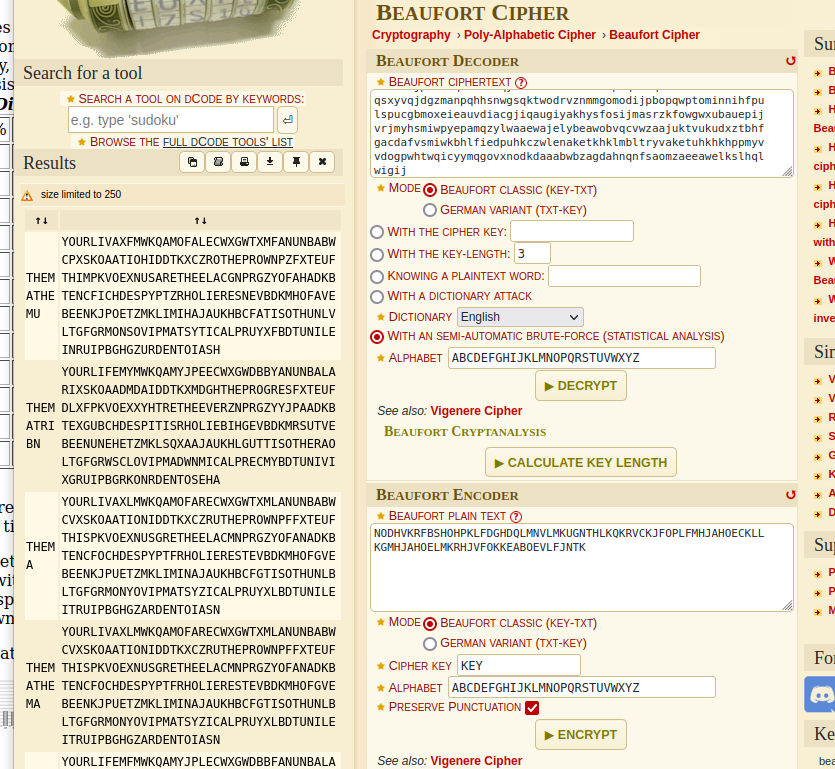

We see that the guessed keys start with "THEMAT" or "THEMATRI", which we had already hinted at ourselves earlier one with the "Wake up, you" hint. The next phrase in the movie is "the matrix has you". Let's try that as our key.

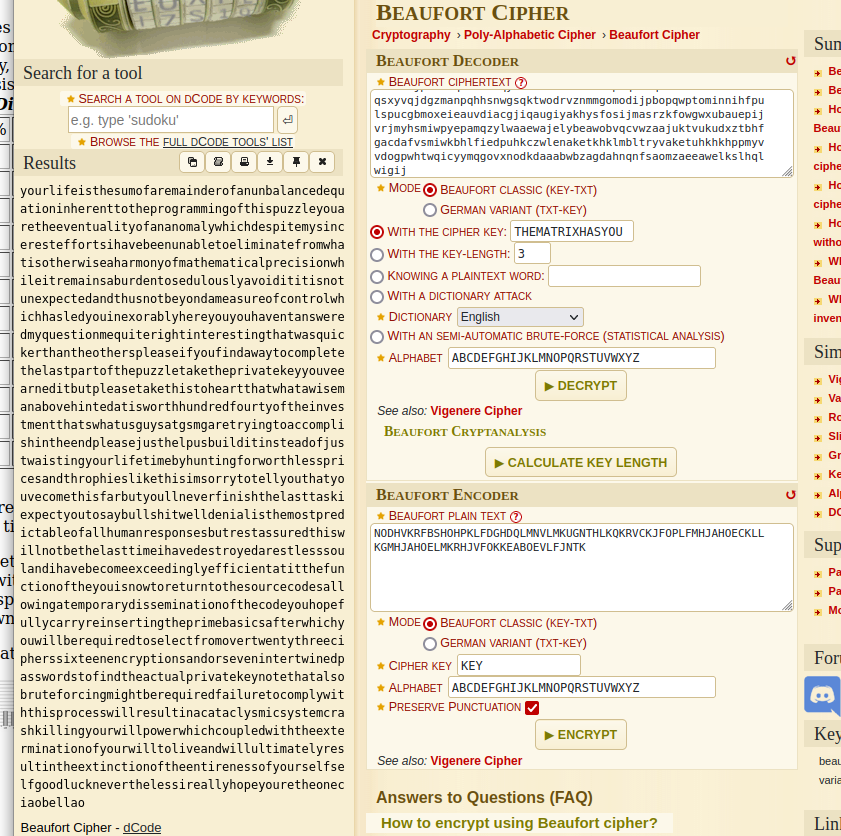

Success, now we have the string

> yourlifeisthesumofaremainderofanunbalancedequationinherenttotheprogrammingofthispuzzleyouaretheeventualityofananomalywhichdespitemysinceresteffortsihavebeenunabletoeliminatefromwhatisotherwiseaharmonyofmathematicalprecisionwhileitremainsaburdentosedulouslyavoidititisnotunexpectedandthusnotbeyondameasureofcontrolwhichhasledyouinexorablyhereyouyouhaventansweredmyquestionmequiterightinterestingthatwasquickerthantheotherspleaseifyoufindawaytocompletethelastpartofthepuzzletaketheprivatekeyyouveearneditbutpleasetakethistoheartthatwhatawisemanabovehintedatisworthhundredfourtyoftheinvestmentthatswhatusguysatgsmgaretryingtoaccomplishintheendpleasejusthelpusbuilditinsteadofjustwaistingyourlifetimebyhuntingforworthlesspricesandthrophieslikethisimsorrytotellyouthatyouvecomethisfarbutyoullneverfinishthelasttaskiexpectyoutosaybullshitwelldenialisthemostpredictableofallhumanresponsesbutrestassuredthiswillnotbethelasttimeihavedestroyedarestlesssoulandihavebecomeexceedinglyefficientatitthefunctionoftheyouisnowtoreturntothesourcecodesallowingatemporarydisseminationofthecodeyouhopefullycarryreinsertingtheprimebasicsafterwhichyouwillberequiredtoselectfromovertwentythreecipherssixteenencryptionsandorsevenintertwinedpasswordstofindtheactualprivatekeynotethatalsobruteforcingmightberequiredfailuretocomplywiththisprocesswillresultinacataclysmicsystemcrashkillingyourwillpowerwhichcoupledwiththeexterminationofyourwilltoliveandwillultimatelyresultintheextinctionoftheentirenessofyourselfselfgoodluckneverthelessireallyhopeyouretheoneciaobellao

And if we split it on words, which appear to be the next part of the architect's speach after "Why am I here?":

> your life is the sum of a remainder of an unbalanced equation inherent to the programming of this puzzle you are the eventuality of ananomaly which despite my sincerest efforts i have been unable to eliminate from what is otherwise a harmony of mathematical precision while it remains a burden to sedulously avoid it it is not unexpected and thus not beyond a measure of control which has led you inexorably here you you havent answered my question me quite right interesting that was quicker than the others please if you find away to complete the last part of the puzzle take the private key youve earned it but please take this to heart that what a wise man above hinted at is worth hundred fourty of the investment thats what us guys at gsmg are trying to accomplish in the end please just help us build it instead of just waisting your life time by hunting for worthless prices and throphies like this im sorry to tell you that youve come this far but youll never finish the last task i expect you to say bullshit well denial is the most predictable of all human responses but rest assured this will not be the last time i have destroyed a restless soul and i have become exceedingly efficient at it the function of the you is now to return to the source codes allowing a temporary dissemination of the code you hopefully carry reinserting the prime basics after which you will be required to select from over twentythree ciphers sixteen encryptions and or seven intertwined passwords to find the actual private key note that also bruteforcing might be required failure to comply with this process will result in a cataclysmic system crash killing your will power which coupled with the extermination of your will to live and will ultimately result in the extinction of the entireness of yourself self good luck nevertheless i really hope youre the one ciao bella o

There isn't really a puzzle in that, but maybe it'll be useful in the future

Finally, we have a list of numbers.

> 15165943121972409169171213758951813141543131412428154191312181219433121171617137149110916631213131281491109166131412199114371612126021664313711154112

### Observations
* There are a lot of "1", and given the previous part's use of a classical cipher, it'll likely be another classical cipher.
* One classical cipher that uses numbers where one has a high occurance is the vic cipher, but it requires two digits, and an alphabet.

### Solving

(Please note, that this step was actually solved by trying every cipher that can be found in online tools)

We'll try the same numbers we found before "1" and "4", then we notice the very strange phrase in the following line "fubcd-king & oracle-queen, thingky mvps". To make it an alphabet we have to remove punctuation, then remove repeating letters, then finally add the missing letters and `./`

1. fubcd-king & oracle-queen, thingky mvps
2. fubcdking oraclequeen thingky mvps
3. fubcdking orale q thy mvps
4. fubcdking orale q thy mvpsjwxz./

If we plug these into a [vic cipher solver](https://www.dcode.fr/vic-cipher) we unfortunately don't get anything we can use. Maybe we're off on our alphabet. Since "thingky" includes all the letters of "king", we can try removing "king" instead, and we want to use the "n" in "thingky", so we can also remove "queen":


1. fubcd-king & oracle-queen, thingky mvps
2. fubcdking oraclequeen thingky mvps
3. fubcd oracle thingky mvps  (this has unique almost letters, we need to remove the c in oracle)
4. fubcd orale thingky mvps zjqwx./ (add the rest of the letters to the end)

If we again plug this into the solver, we unfortunately see somethang doesn't quite look like english text. What if we needed "C" in oracle `fubcd oracle thingky mvps zjqwx.`

This time we see something that is almost english: `IN5ASEYOUMANAGETO5RA5KTHISTHEPRIVATEKEYSBELONGTOHALFANDBETTERHALFANDTHEYALSONEEDFUNDSTOLIVE`

Perhaps the "C" in oracle needs to be one of the punctuation, let's try `/`: `fubcdora/lethingkymvpszjqwx.`

Success:
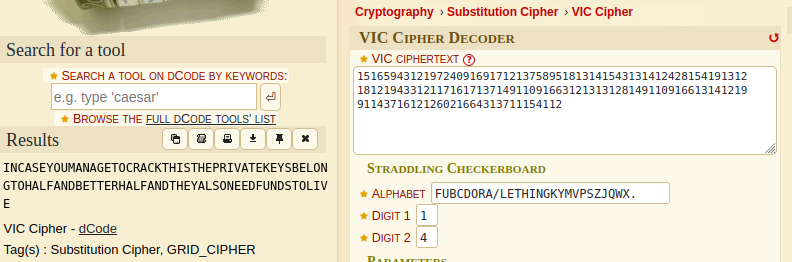


> INCASEYOUMANAGETOCRACKTHISTHEPRIVATEKEYSBELONGTOHALFANDBETTERHALFANDTHEYALSONEEDFUNDSTOLIVE

> IN CASE YOU MANAGE TO CRACK THIS THE PRIVATE KEYS BELONG TO HALF AND BETTER HALF AND THEY ALSO NEED FUNDS TO LIVE


At this point in time, the AES, and how to interpret the rest of this phase has not been solved.

The puzzle was solved to this point by the end of 2019